<a href="https://colab.research.google.com/github/andrey101010/ds-challenge-S-and-S/blob/main/S_and_S_Weld_Defect_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# These libraries are needed for the project.  
# To make use of this notebook the appropriate csv files need to be droped in the '/content' folder!
# You need to load weld images before you can access the script!

import os
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
from google.colab.patches import cv2_imshow

import cv2
from skimage import color
from skimage import io

mpl.rcParams['figure.figsize'] = (20, 20)

# Loading Data

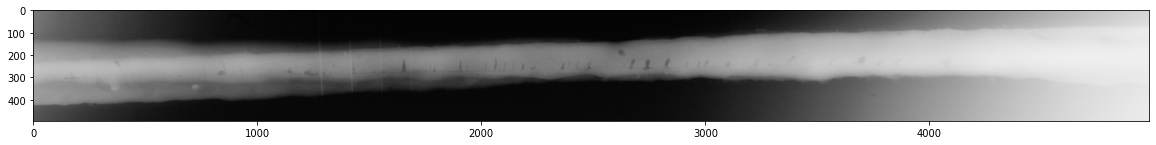

In [ ]:
# Set the root directory
root_dir = '/content/'
img_list = [] # contains later all images

# Walk through all the sub-directories
for root, dirs, files in os.walk(root_dir): # tuple list therefore the 3 outputs of the for-loop (root, dirs, files).
    for i, file in enumerate(files):
        # Check if the file is a png image
        if file.endswith(".png"):
         
          img = cv2.imread(os.path.join(root, file))
          img_list.append(img)
          # Display the image
          plt.imshow(img, cmap = 'gray')
          plt.axis('on')
          # plt.show() # comment out if you want to see the images
          # print(img.shape) # comment out if you want to see the shape of an image


In [ ]:
# If the files and the notebook are in the same folder. Otherwise you have to change the directory
pwd = !pwd

In [ ]:
filelist=os.listdir(pwd[0])
for fichier in filelist[:]: # filelist[:] makes a copy of filelist.
    if not(fichier.endswith(".png")):
        filelist.remove(fichier)

In [ ]:
for i in range(len(img_list)):
  img = img_list[i]
  # Convert the image to a 2D array 
  X = img.reshape(-1, 1)

  # Perform KMeans clustering on the RGB values
  kmeans = KMeans(n_clusters=6, random_state=0).fit(X)

  # Assign each pixel to a cluster
  labels = kmeans.predict(X)

  # Reshape the labels to the same shape as the original image
  segmented_image = labels.reshape(img.shape[0], img.shape[1])

  # Plot the original image and the segmented image
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.imshow(img)
  plt.title("Original Image")
  plt.axis("off")

  plt.subplot(1, 2, 2)
  plt.imshow(segmented_image)
  plt.title("Segmented Image")
  plt.axis("off")

  plt.show()

ValueError: ignored

# OpenCV approach

In [ ]:
# first tryouts
img = cv2.imread('/content/W0001_0001.png')
ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV)

In [ ]:
threshold = 50 
upper = 160

ret,thresh1 = cv2.threshold(img,threshold,upper,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,threshold,upper,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,threshold,upper,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,threshold,upper,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,threshold,upper,cv2.THRESH_TOZERO_INV)

In [ ]:
type(thresh1)

numpy.ndarray

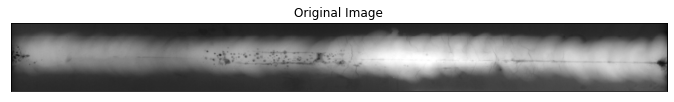

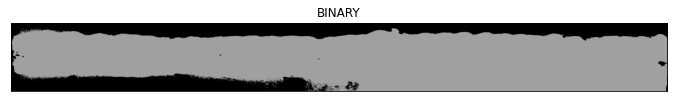

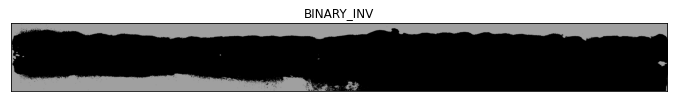

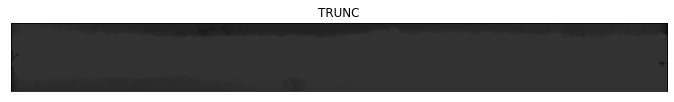

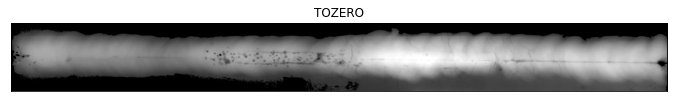

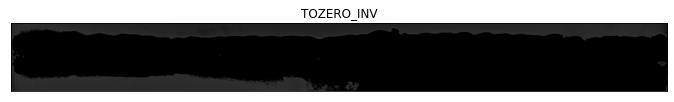

In [ ]:
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(0, 6):
    plt.figure(figsize = (40, 40))
    plt.subplot(2,3,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

In [ ]:
type(img)

numpy.ndarray

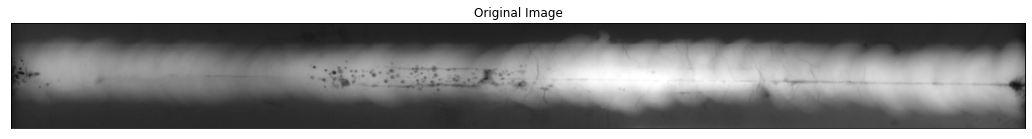

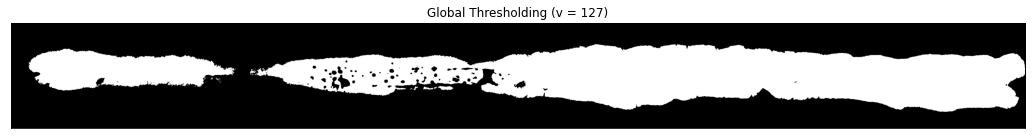

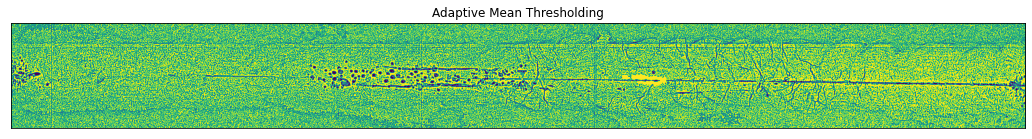

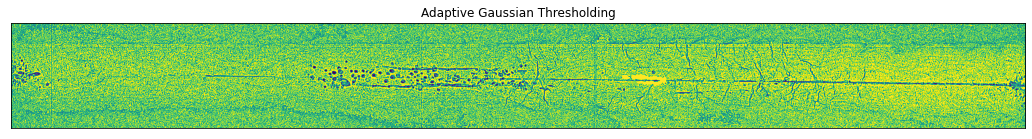

In [ ]:
_, th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

th2 = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 1)
th3 = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 5, 1)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.figure(figsize = (40, 40))
    plt.subplot(2,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Edge detection and Final Product


Laplacian filter is able to do edge detection. However, since the results were not promising this section is commented out.

In [ ]:
# laplacian_filter = cv2.Laplacian(gauss_filter, cv2.CV_64F, ksize = 13) 
# plt.imshow(laplacian_filter)

# Sobel filter approach

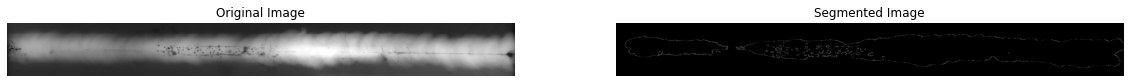

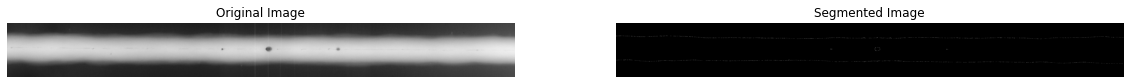

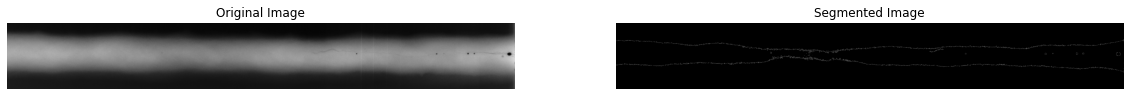

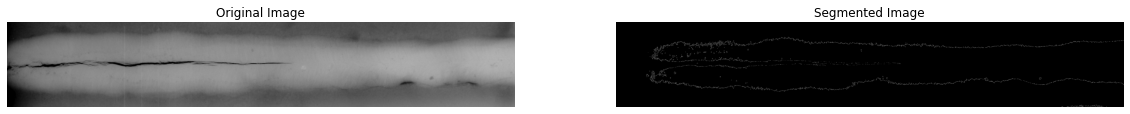

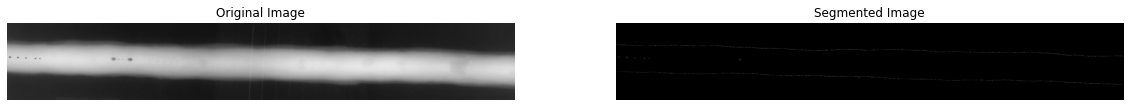

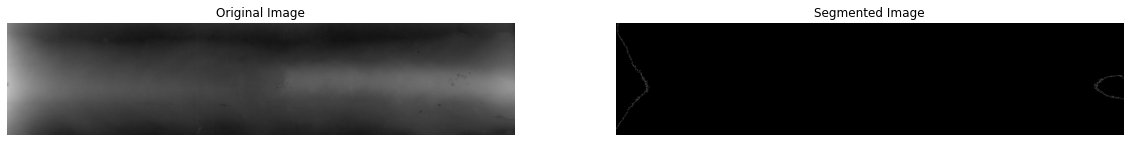

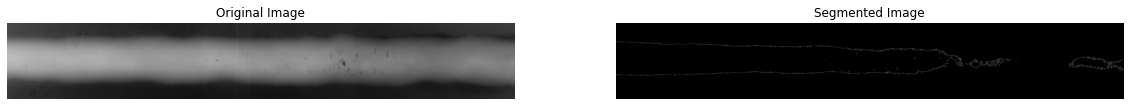

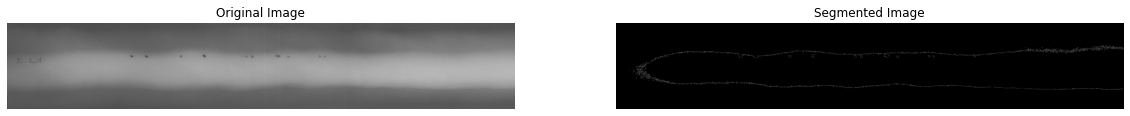

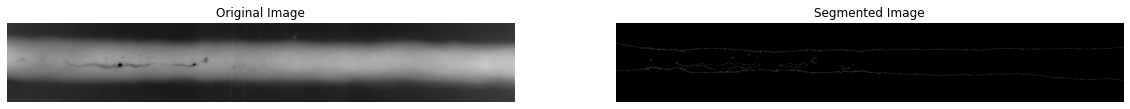

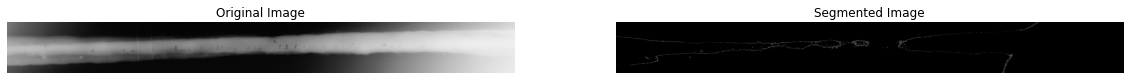

In [ ]:
for i in range(len(img_list)):
  img = cv2.imread(filelist[i])

  # Gauß filter to remove noise
  gauss_filter = cv2.GaussianBlur(img,(3,3),0)
  ret, gray = cv2.threshold(gauss_filter,127,255, cv2.THRESH_BINARY_INV, cv2.THRESH_OTSU)

  # Edge detection with Canny filter
  gauss_filter = gray.astype(np.uint8)

  # Dilate the image
  sobel_filter = cv2.Sobel(gauss_filter, dx = 1, dy = 2, ddepth = 2) 
  segmented_image = sobel_filter

  # Plot the original image and the segmented image
  plt.figure(figsize=(20, 10))
  plt.subplot(1, 2, 1)
  plt.imshow(img)
  plt.title("Original Image")
  plt.axis("off")

  plt.subplot(1, 2, 2)
  plt.imshow(segmented_image)
  plt.title("Segmented Image")
  plt.axis("off")

  plt.show()

# Canny filter approach and Final Product

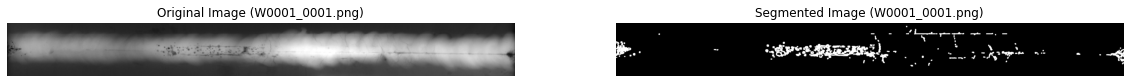

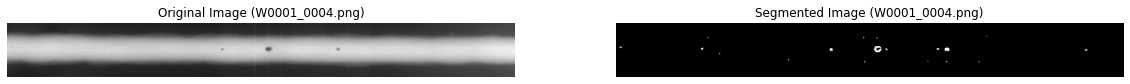

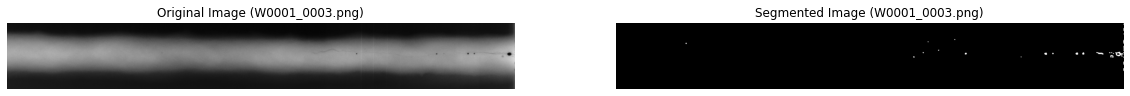

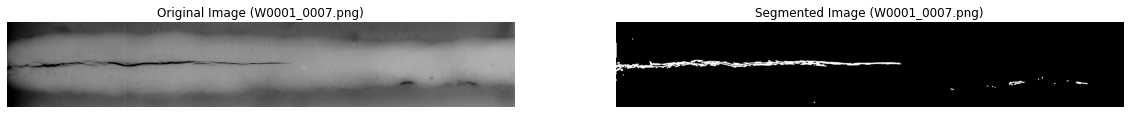

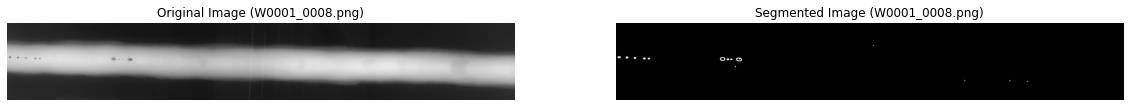

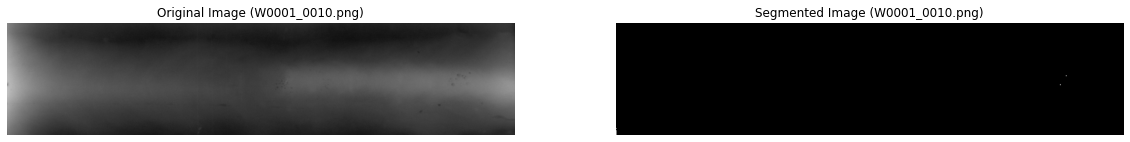

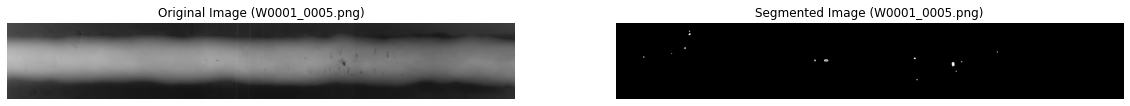

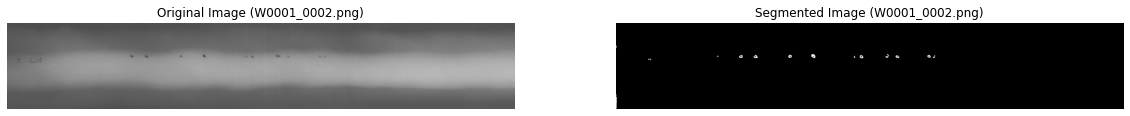

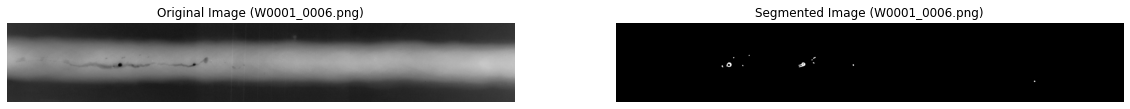

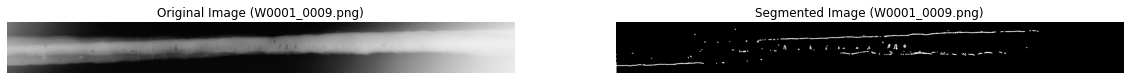

In [ ]:
for i in range(len(img_list)):
  # read in the images
  img = cv2.imread(filelist[i])

  # use canny filter for edge detection
  canny_filter = cv2.Canny(img, 50, 60) 

  # increses the area of interest
  kernel = np.ones((3,3),np.uint8)
  dilation = cv2.dilate(canny_filter,kernel,iterations = 3)
    
  # plot the original image and the segmented image
  plt.figure(figsize=(20, 10))
  plt.subplot(1, 2, 1)
  plt.imshow(img)
  plt.title("Original Image ({})".format(filelist[i]))
  plt.axis("off")

  plt.subplot(1, 2, 2)
  plt.imshow(dilation) # segmented images in color
  plt.imshow(dilation, cmap = 'gray') # segmented images in grayscale  
  plt.title("Segmented Image ({})".format(filelist[i]))
  plt.axis("off")

  plt.show()